=== CUSTOMER BEHAVIOR ANALYSIS ===

1. DATASET SELECTION AND DESCRIPTION

Dataset: Customer Behavior Analysis Dataset
Source: Synthetic customer behavior data for e-commerce analysis
Records: 1000 entries
Attributes: 28 features

This dataset is appropriate for our project because:
- It meets the size requirements (1000 records, 28 attributes > 8-10 required)
- Contains diverse data types (numerical, categorical, boolean)
- Represents real-world business scenarios (customer behavior analysis)
- Suitable for multiple data mining techniques (regression, classification, clustering)
- Has missing values that require proper handling
- Rich feature set for comprehensive analysis


Dataset loaded successfully!
Shape: (1000, 28)

2. DATA STRUCTURE INSPECTION

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 ------

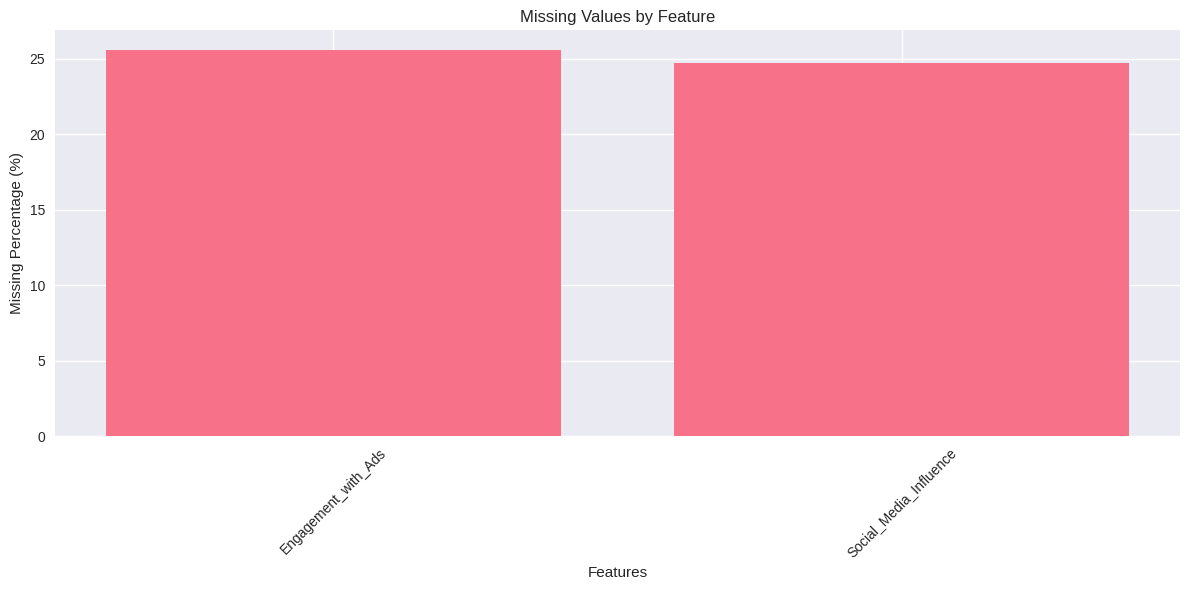


3.2 Handling Missing Values
------------------------------
Filled missing values in 'Social_Media_Influence' with mode: High
Filled missing values in 'Engagement_with_Ads' with mode: High

Missing values after cleaning: 0

3.3 Duplicate Records Check
------------------------------
Number of duplicate records: 0

3.4 Data Type Corrections
------------------------------
Converted Purchase_Amount to numeric scale

4. EXPLORATORY DATA ANALYSIS

4.1 Descriptive Statistics
------------------------------
Numerical Features Summary:
               Age  Frequency_of_Purchase  Brand_Loyalty  Product_Rating  \
count  1000.000000            1000.000000    1000.000000     1000.000000   
mean     34.304000               6.945000       3.026000        3.033000   
std       9.353238               3.147361       1.416803        1.436654   
min      18.000000               2.000000       1.000000        1.000000   
25%      26.000000               4.000000       2.000000        2.000000   
50%      34.

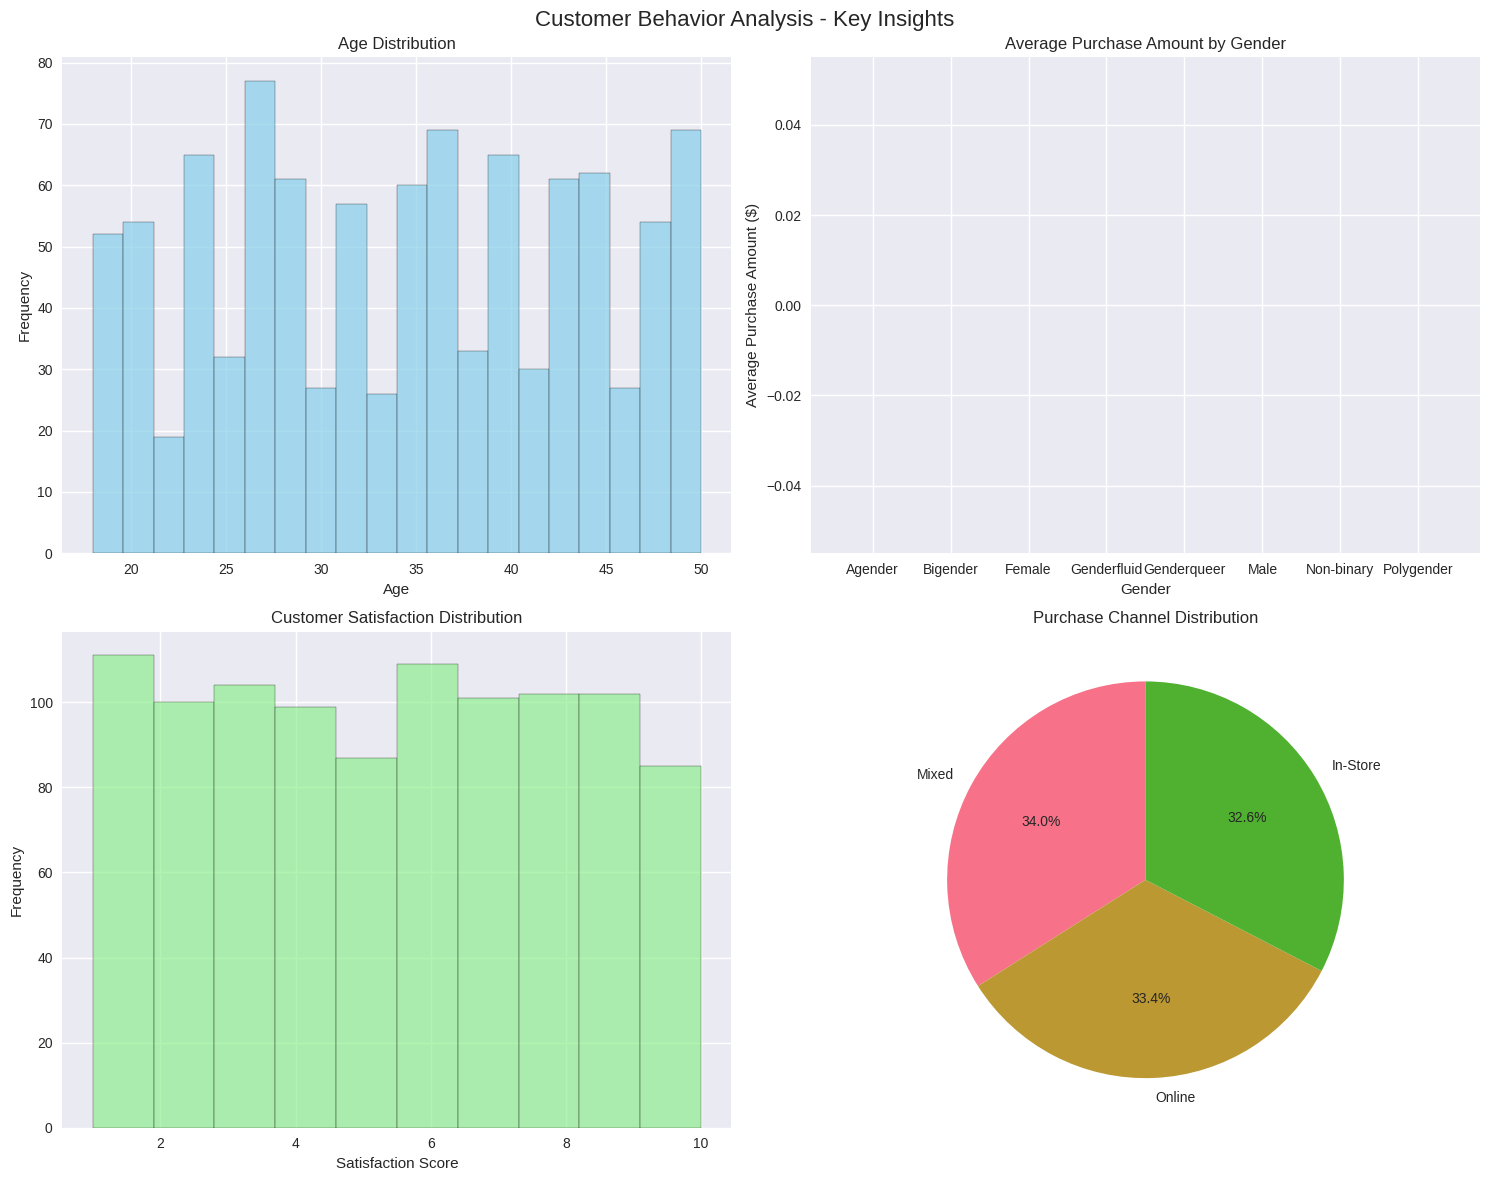

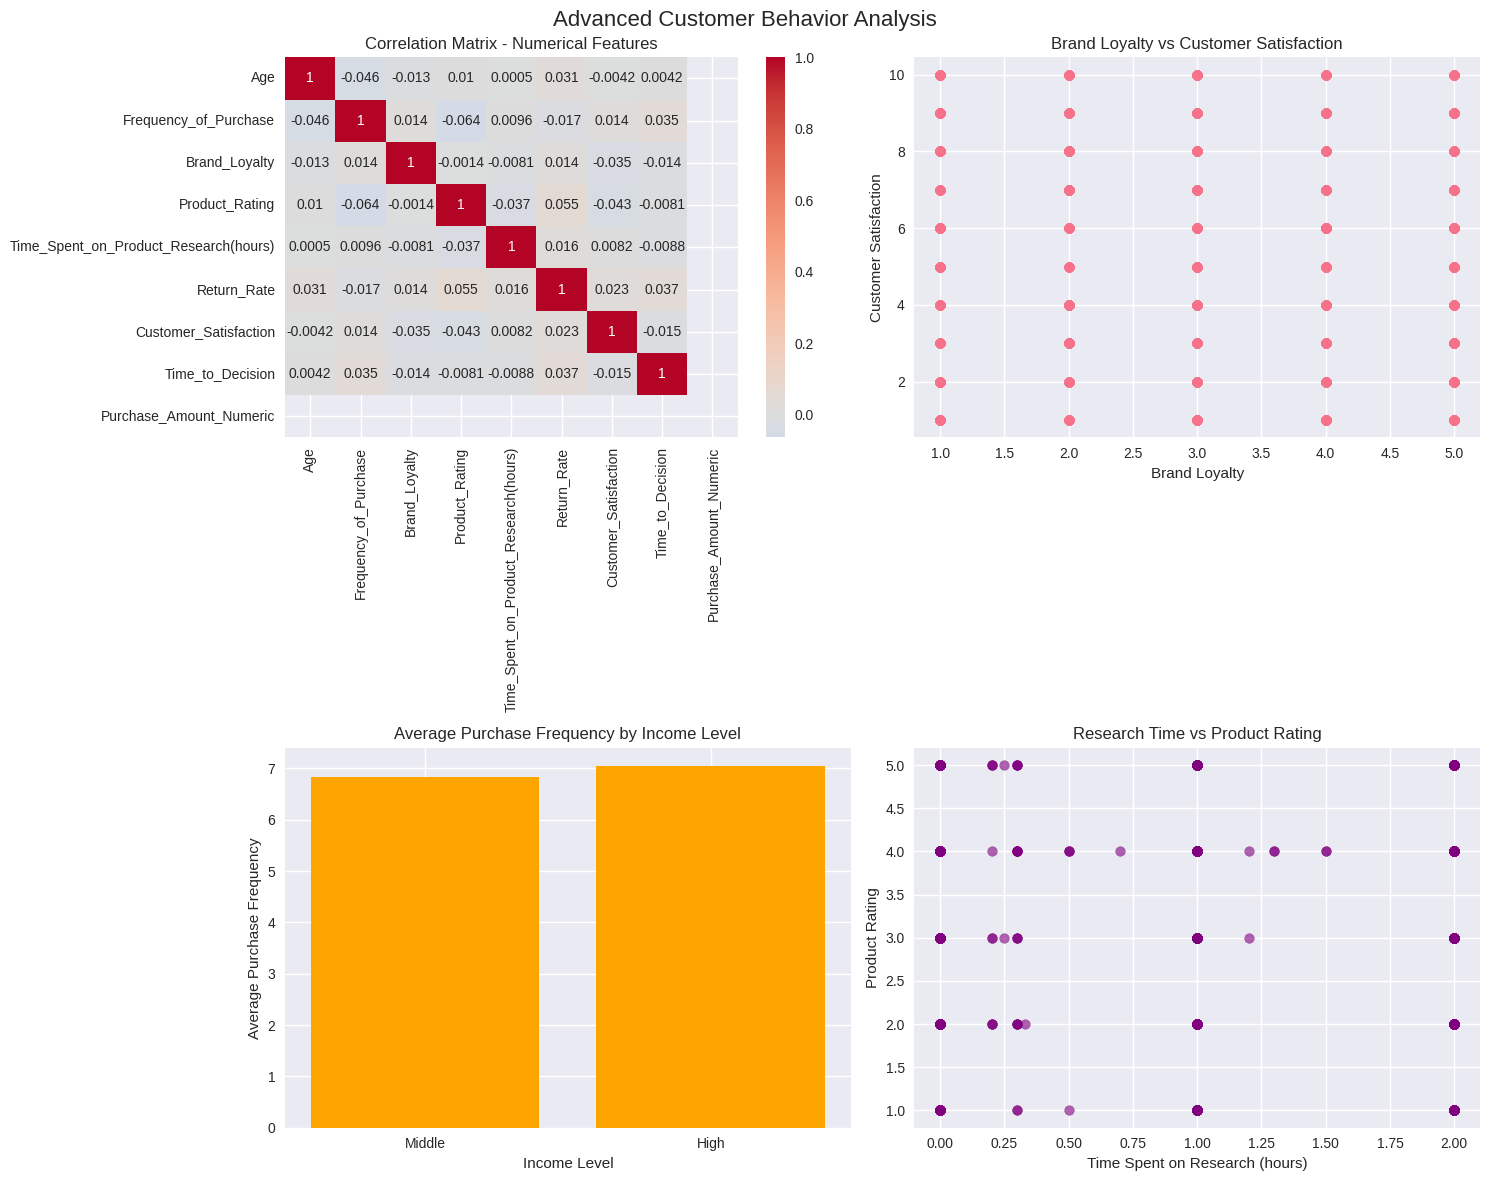


4.3 Outlier Detection
--------------------
Outlier Analysis:
                                 Feature  Outlier_Count  Outlier_Percentage  \
0                                    Age              0                 0.0   
1                  Frequency_of_Purchase              0                 0.0   
2                          Brand_Loyalty              0                 0.0   
3  Time_Spent_on_Product_Research(hours)              0                 0.0   

   Lower_Bound  Upper_Bound  
0          2.0         66.0  
1         -5.0         19.0  
2         -1.0          7.0  
3         -3.0          5.0  


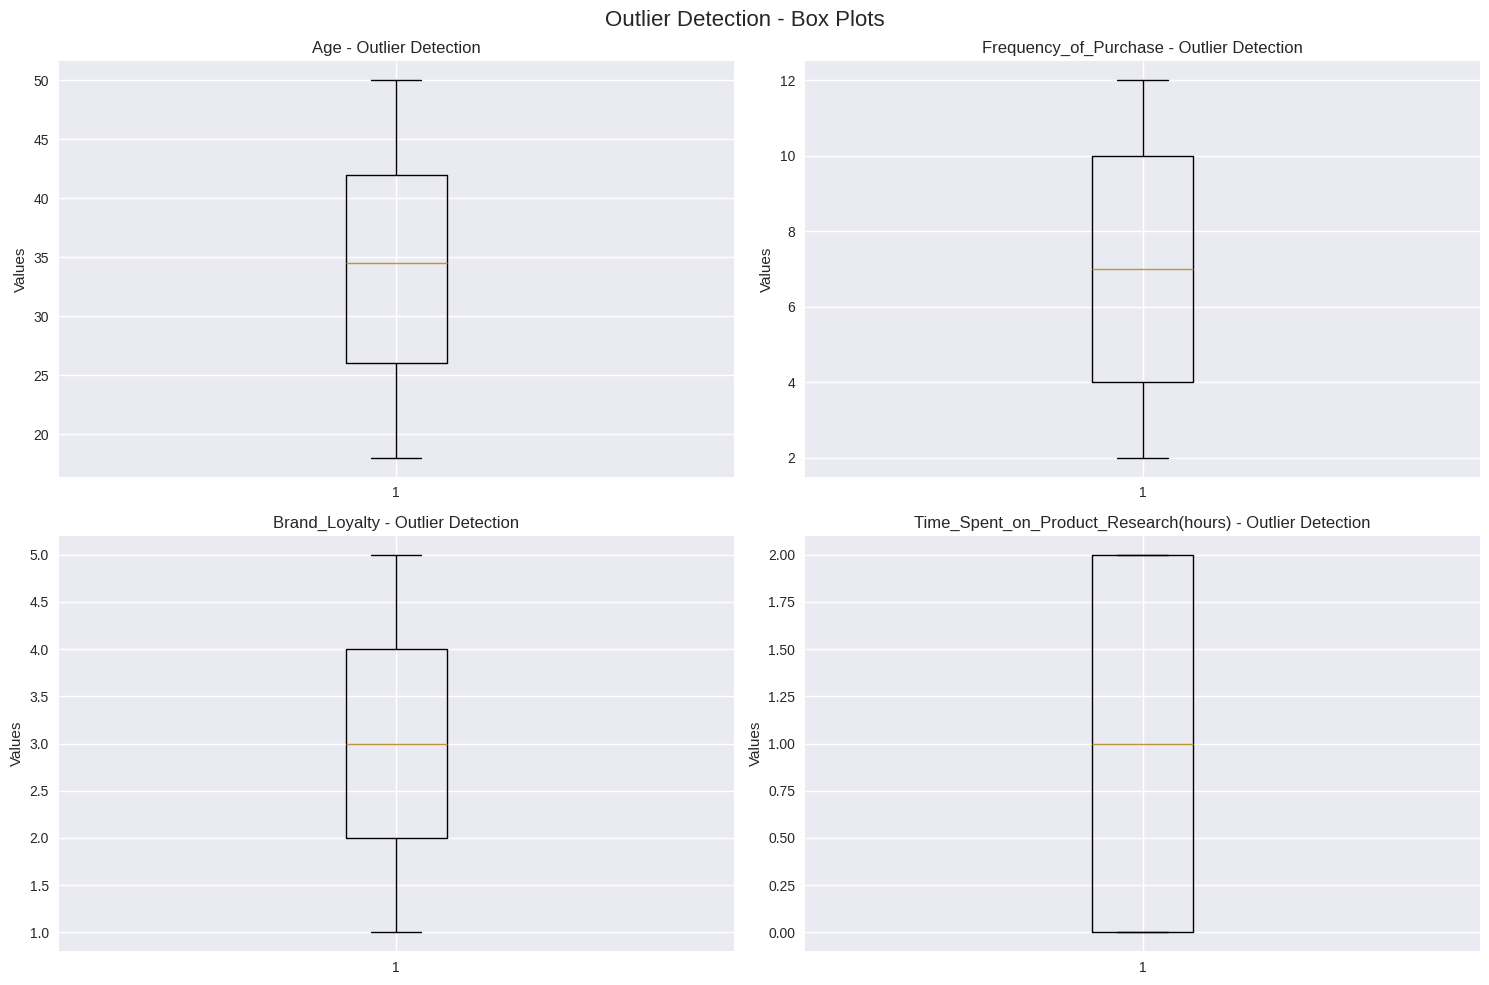


5. NEXT STEPS FOR FUTURE MODELING

Based on this analysis, the following steps will guide future modeling:

1. FEATURE ENGINEERING:
   - Create derived features from existing data
   - Encode categorical variables appropriately
   - Scale numerical features for modeling

2. POTENTIAL MODELING APPROACHES:
   - Regression: Predict purchase amount or customer satisfaction
   - Classification: Classify customers into loyalty segments
   - Clustering: Group customers based on behavior patterns
   - Association Rules: Find relationships between purchase patterns

3. DATA PREPARATION:
   - Handle remaining outliers if necessary
   - Create train-test splits
   - Apply appropriate preprocessing techniques

4. MODEL EVALUATION:
   - Define appropriate metrics for each model type
   - Implement cross-validation strategies
   - Compare multiple algorithms

Dataset is now ready for advanced modeling techniques!
Final dataset shape: (1000, 29)
Features prepared for modeling: 29


In [1]:
# Advanced Big Data and Data Mining - Project Deliverable 1

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("=== CUSTOMER BEHAVIOR ANALYSIS ===")
print("="*60)

# 1. DATASET SELECTION AND DESCRIPTION
print("\n1. DATASET SELECTION AND DESCRIPTION")
print("="*40)

dataset_description = """
Dataset: Customer Behavior Analysis Dataset
Source: Synthetic customer behavior data for e-commerce analysis
Records: 1000 entries
Attributes: 28 features

This dataset is appropriate for our project because:
- It meets the size requirements (1000 records, 28 attributes > 8-10 required)
- Contains diverse data types (numerical, categorical, boolean)
- Represents real-world business scenarios (customer behavior analysis)
- Suitable for multiple data mining techniques (regression, classification, clustering)
- Has missing values that require proper handling
- Rich feature set for comprehensive analysis
"""

print(dataset_description)
df = pd.read_csv("/content/sample_data/Ecommerce_Consumer_Behavior_Analysis_Data.csv")

print(f"\nDataset loaded successfully!")
print(f"Shape: {df.shape}")

# 2. DATA INSPECTION
print("\n2. DATA STRUCTURE INSPECTION")
print("="*35)

print("\nDataset Info:")
print(df.info())

print("\nFirst 5 rows:")
print(df.head())

print("\nDataset Shape:", df.shape)
print("Number of Features:", len(df.columns))
print("Number of Records:", len(df))

# Data types summary
print("\nData Types Summary:")
print(df.dtypes.value_counts())

# 3. DATA CLEANING
print("\n3. DATA CLEANING")
print("="*20)

print("\n3.1 Missing Values Analysis")
print("-" * 30)

missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_summary = pd.DataFrame({
    'Missing_Count': missing_values,
    'Missing_Percentage': missing_percentage
}).sort_values('Missing_Count', ascending=False)

print("Missing Values Summary:")
print(missing_summary[missing_summary['Missing_Count'] > 0])

# Visualize missing values
plt.figure(figsize=(12, 6))
missing_cols = missing_summary[missing_summary['Missing_Count'] > 0]
if not missing_cols.empty:
    plt.bar(missing_cols.index, missing_cols['Missing_Percentage'])
    plt.title('Missing Values by Feature')
    plt.xlabel('Features')
    plt.ylabel('Missing Percentage (%)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Handle missing values
print("\n3.2 Handling Missing Values")
print("-" * 30)

# Strategy for handling missing values
missing_handling_strategy = {
    'Social_Media_Influence': 'mode',  # Most frequent value
    'Engagement_with_Ads': 'mode'      # Most frequent value
}

df_cleaned = df.copy()

for column, strategy in missing_handling_strategy.items():
    if strategy == 'mode':
        mode_value = df_cleaned[column].mode()[0]
        df_cleaned[column].fillna(mode_value, inplace=True)
        print(f"Filled missing values in '{column}' with mode: {mode_value}")

print(f"\nMissing values after cleaning: {df_cleaned.isnull().sum().sum()}")

print("\n3.3 Duplicate Records Check")
print("-" * 30)

duplicates = df_cleaned.duplicated().sum()
print(f"Number of duplicate records: {duplicates}")

if duplicates > 0:
    df_cleaned = df_cleaned.drop_duplicates()
    print(f"Removed {duplicates} duplicate records")

print("\n3.4 Data Type Corrections")
print("-" * 30)

# Convert Purchase_Amount to numerical for analysis
def convert_purchase_amount(amount_str):
    if amount_str == '$0-50':
        return 25
    elif amount_str == '$51-100':
        return 75
    elif amount_str == '$101-200':
        return 150
    elif amount_str == '$201-500':
        return 350
    elif amount_str == '$500+':
        return 750
    else:
        return 0

df_cleaned['Purchase_Amount_Numeric'] = df_cleaned['Purchase_Amount'].apply(convert_purchase_amount)
print("Converted Purchase_Amount to numeric scale")

# 4. EXPLORATORY DATA ANALYSIS (EDA)
print("\n4. EXPLORATORY DATA ANALYSIS")
print("="*35)

print("\n4.1 Descriptive Statistics")
print("-" * 30)

# Numerical features
numerical_cols = ['Age', 'Frequency_of_Purchase', 'Brand_Loyalty', 'Product_Rating',
                 'Time_Spent_on_Product_Research(hours)', 'Return_Rate',
                 'Customer_Satisfaction', 'Time_to_Decision', 'Purchase_Amount_Numeric']

print("Numerical Features Summary:")
print(df_cleaned[numerical_cols].describe())

# Categorical features
categorical_cols = ['Gender', 'Income_Level', 'Marital_Status', 'Education_Level',
                   'Purchase_Category', 'Purchase_Channel', 'Discount_Sensitivity']

print("\nCategorical Features Summary:")
for col in categorical_cols:
    print(f"\n{col}:")
    print(df_cleaned[col].value_counts())

print("\n4.2 Data Visualizations")
print("-" * 25)

# Set up the plotting area
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Customer Behavior Analysis - Key Insights', fontsize=16)

# 1. Age Distribution
axes[0, 0].hist(df_cleaned['Age'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Age Distribution')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')

# 2. Purchase Amount by Gender
purchase_gender = df_cleaned.groupby('Gender')['Purchase_Amount_Numeric'].mean()
axes[0, 1].bar(purchase_gender.index, purchase_gender.values, color=['pink', 'lightblue'])
axes[0, 1].set_title('Average Purchase Amount by Gender')
axes[0, 1].set_xlabel('Gender')
axes[0, 1].set_ylabel('Average Purchase Amount ($)')

# 3. Customer Satisfaction Distribution
axes[1, 0].hist(df_cleaned['Customer_Satisfaction'], bins=10, alpha=0.7, color='lightgreen', edgecolor='black')
axes[1, 0].set_title('Customer Satisfaction Distribution')
axes[1, 0].set_xlabel('Satisfaction Score')
axes[1, 0].set_ylabel('Frequency')

# 4. Purchase Channel Distribution
channel_counts = df_cleaned['Purchase_Channel'].value_counts()
axes[1, 1].pie(channel_counts.values, labels=channel_counts.index, autopct='%1.1f%%', startangle=90)
axes[1, 1].set_title('Purchase Channel Distribution')

plt.tight_layout()
plt.show()

# Additional visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Advanced Customer Behavior Analysis', fontsize=16)

# 1. Correlation heatmap for numerical features
corr_matrix = df_cleaned[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, ax=axes[0, 0])
axes[0, 0].set_title('Correlation Matrix - Numerical Features')

# 2. Brand Loyalty vs Customer Satisfaction
axes[0, 1].scatter(df_cleaned['Brand_Loyalty'], df_cleaned['Customer_Satisfaction'], alpha=0.6)
axes[0, 1].set_xlabel('Brand Loyalty')
axes[0, 1].set_ylabel('Customer Satisfaction')
axes[0, 1].set_title('Brand Loyalty vs Customer Satisfaction')

# 3. Purchase Frequency by Income Level
income_freq = df_cleaned.groupby('Income_Level')['Frequency_of_Purchase'].mean().sort_values()
axes[1, 0].bar(income_freq.index, income_freq.values, color='orange')
axes[1, 0].set_title('Average Purchase Frequency by Income Level')
axes[1, 0].set_xlabel('Income Level')
axes[1, 0].set_ylabel('Average Purchase Frequency')

# 4. Time Spent on Research vs Product Rating
axes[1, 1].scatter(df_cleaned['Time_Spent_on_Product_Research(hours)'],
                  df_cleaned['Product_Rating'], alpha=0.6, color='purple')
axes[1, 1].set_xlabel('Time Spent on Research (hours)')
axes[1, 1].set_ylabel('Product Rating')
axes[1, 1].set_title('Research Time vs Product Rating')

plt.tight_layout()
plt.show()

print("\n4.3 Outlier Detection")
print("-" * 20)

# Detect outliers using IQR method
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

outlier_summary = []
for col in ['Age', 'Frequency_of_Purchase', 'Brand_Loyalty', 'Time_Spent_on_Product_Research(hours)']:
    outliers, lower, upper = detect_outliers_iqr(df_cleaned, col)
    outlier_summary.append({
        'Feature': col,
        'Outlier_Count': len(outliers),
        'Outlier_Percentage': (len(outliers) / len(df_cleaned)) * 100,
        'Lower_Bound': lower,
        'Upper_Bound': upper
    })

outlier_df = pd.DataFrame(outlier_summary)
print("Outlier Analysis:")
print(outlier_df)

# Box plots for outlier visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Outlier Detection - Box Plots', fontsize=16)

numerical_features = ['Age', 'Frequency_of_Purchase', 'Brand_Loyalty', 'Time_Spent_on_Product_Research(hours)']
for i, col in enumerate(numerical_features):
    row = i // 2
    col_idx = i % 2
    axes[row, col_idx].boxplot(df_cleaned[col])
    axes[row, col_idx].set_title(f'{col} - Outlier Detection')
    axes[row, col_idx].set_ylabel('Values')

plt.tight_layout()
plt.show()


print("\n5. NEXT STEPS FOR FUTURE MODELING")
print("="*40)

next_steps = """
Based on this analysis, the following steps will guide future modeling:

1. FEATURE ENGINEERING:
   - Create derived features from existing data
   - Encode categorical variables appropriately
   - Scale numerical features for modeling

2. POTENTIAL MODELING APPROACHES:
   - Regression: Predict purchase amount or customer satisfaction
   - Classification: Classify customers into loyalty segments
   - Clustering: Group customers based on behavior patterns
   - Association Rules: Find relationships between purchase patterns

3. DATA PREPARATION:
   - Handle remaining outliers if necessary
   - Create train-test splits
   - Apply appropriate preprocessing techniques

4. MODEL EVALUATION:
   - Define appropriate metrics for each model type
   - Implement cross-validation strategies
   - Compare multiple algorithms
"""

print(next_steps)

print("Dataset is now ready for advanced modeling techniques!")
print("Final dataset shape:", df_cleaned.shape)
print("Features prepared for modeling:", len(df_cleaned.columns))